<img src="introduction.PNG">

# Introduction

In this notebook, we plot feature correlations, $\rho_{i,\boldsymbol{y}}$, to the outcome (weekend movie revenue).

A least squares regression model, $\psi$, is built using the training / validation dataset built in the previous notebook.
The predictions of the model on the validation set are then plotted in aggregate, for a single movie, and for a single weekend.

General Azure ML Studio info:
-  https://docs.microsoft.com/en-us/azure/machine-learning/studio/what-is-ml-studio

# Feature Correlations to Weekend Movie Gross

The dataset created in the previous notebook is used as input - 

**Training and Validation:**
-  box_office_training_validation_dataset.csv
    
Feature correlations are calculated via Microsoft Azure ML Studio: 

**Associated Azure ML Studio Experiment:**
-  https://gallery.cortanaintelligence.com/Experiment/Feature-Correlations-Weekend-Box-Office-Movie-Revenue
    
The output of the experiment (input to the code below) is stored as - box_office_feature_correlations.csv. 

Here we plot the correlations of several variables to the gross of a movie. Pearson correlation is used 
(https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

The correlation between a column or feature $col_i(\boldsymbol{X})$, in matrix $\boldsymbol{X}$, and the output labels,
$\boldsymbol{y}$, in the population of data is written as:

\begin{align}
\rho_{i,\boldsymbol{y}} = \frac{cov(col_i(\boldsymbol{X}), \boldsymbol{y})}{\sigma_i \sigma_{\boldsymbol{y}}}
\end{align}

The covariance is denoted by $cov()$ and the standard deviation by $\sigma$.

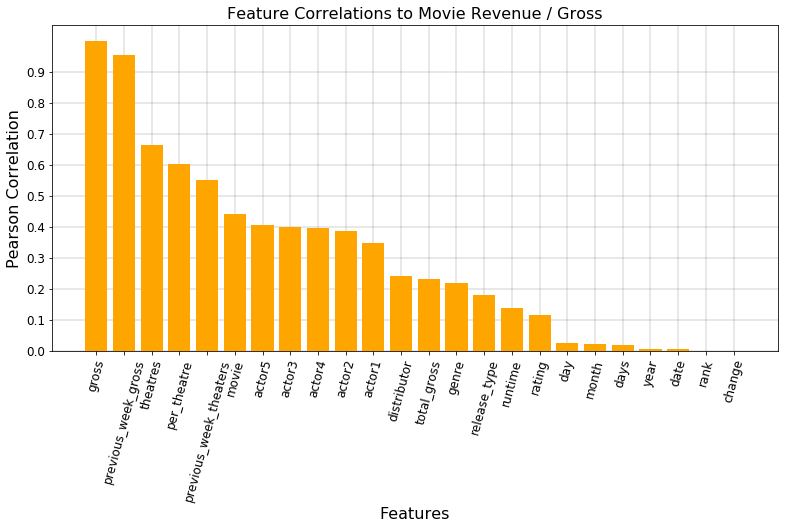

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


# read the data feature correlations to movie revenue from csv
data = pd.read_csv('box_office_feature_correlations.csv', sep=',',header=0)

# number of data points on x axis
ind = np.arange(data.shape[1]) 

# create a bar chart
correlations = data.iloc[[0]].values[0]
fig, ax = plt.subplots()
rects2 = ax.bar(ind, correlations, color='orange', zorder = 3)

# set the size of the resulting graph
fig.set_size_inches(13, 6, forward=True)

# axis labels
plt.ylabel('Pearson Correlation',fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.title('Feature Correlations to Movie Revenue / Gross',fontsize=16)
features = list(data) # feature names / column headers
xticks = []
yticks = []
x = []
y = []

# feature names
count = 0;
for var in features:
    xticks.append(var)
    x.append(count)
    count = count+1

# gross    
count = 0;
for i in range(1, 11):
    y.append(float("{0:.2f}".format(count)))
    count = count+.1

plt.xticks(x, xticks, fontsize=12)
plt.yticks(y, y, fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_rotation(75)
    
# create grid marks within the graph
plt.grid(color='#696969', linestyle='-', linewidth=.3, zorder = 0)

# display graph
plt.show()

# Train and Deploy a Model

**Information on on using Azure ML studio to train and deploy models:**
-  https://docs.microsoft.com/en-us/azure/machine-learning/studio/walkthrough-4-train-and-evaluate-models
-  https://docs.microsoft.com/en-us/azure/machine-learning/studio/walkthrough-5-publish-web-service

The dataset created in the previous notebook is used as input to the Azure ML Studio experiment - 

**Training and Validation:** 
-  box_office_training_validation_dataset.csv

**Associated Azure ML Studio Experiment:**
-  https://gallery.cortanaintelligence.com/Experiment/Forecasting-Weekend-Box-Office-Movie-Revenue-5

The model is built via the Azure ML studio experiment above and the algorithm used is the 
method of least squares (https://en.wikipedia.org/wiki/Least_squares). This produces the prediction function $\psi$. 
    
\begin{align}
\boldsymbol{w} = (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y}
\end{align}

\begin{align}
\psi(\boldsymbol{x}_i) = \sum_{r=1}^{k}w_r x_{i,r}
\end{align}

Categorical variables are one-hot encoded (https://en.wikipedia.org/wiki/One-hot).

Experimenting with the features that go into the model and analyzing the $R^2$ values, it appears that the model ONLY needs
the previous_week_gross in order to be successful. This is a cautionary tale against being overzealous in picking the
most complicated algorithm with complicated features right off the bat. Sometimes, simple is better.

The first output represents predictions made off of a model built only on previous_week_gross, providing the best accuracy.

**Output from ML Studio - Predictions on the validation set:**
-  box_office_validation_predictions.csv
    
The second output represents predictions made off of a model built on previous_week_gross as well as lead actor and 
distributor. This is done so that we can vary the lead actor in a movie and look at how that affects the predictions in a 
subsequent notebook.
    
**Output from ML Studio - Predictions on the validation set:**
-  box_office_validation_predictions_actors.csv

At this point, we also want to deploy our model, $\psi$, as a web-service. This can be accomplished from the predictive 
experiment 
in Azure ML Studio. The deployed web-service will be used in the following notebook to make individual predictions.

**Azure ML Studio Predictive Experiment**
-  https://gallery.cortanaintelligence.com/Experiment/Forecasting-Weekend-Box-Office-Movie-Revenue-Predictive-Exp

# All Movie Revenue Predictions Across Every Weekend in the Timeline

**Input - All movies all validation weeks predictions vs. actuals:**
-  box_office_validation_predictions.csv
    
**Associated Azure ML Studio Experiment:**
-  https://gallery.cortanaintelligence.com/Experiment/Forecasting-Weekend-Box-Office-Movie-Revenue-5

Here, the predictions, $\psi(\boldsymbol{x}_i)$, of all movies across the entire validation / testing dataset are presented. 
Recall that only the top 15 movies at the box-office are considered.

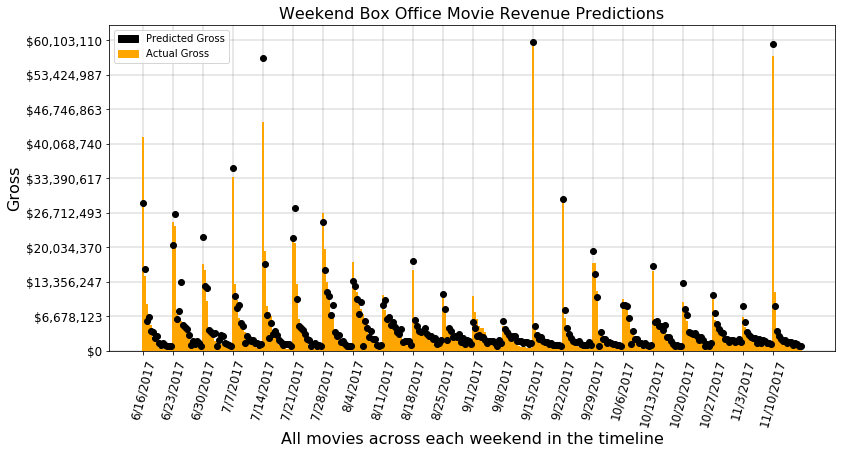

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# read the data output with predictions and actuals from csv
data = pd.read_csv('box_office_validation_predictions.csv', sep=',',header=0)

# number of data points on x axis
ind = np.arange(data.shape[0]) 

# create the two plots - actuals and predicted
fig, ax = plt.subplots()
rects1 = ax.plot(ind, data['Scored Labels'], 'o', color='#000000', zorder = 3)
rects2 = ax.bar(ind, data['gross'], color='orange', zorder = 3)

# set the size of the resulting graph
fig.set_size_inches(13, 6, forward=True)

# create the legend within the graph
predicted = mpatches.Patch(color='#000000')
actual = mpatches.Patch(color='orange')
plt.legend((predicted, actual), ('Predicted Gross', 'Actual Gross'))

# axis labels
plt.ylabel('Gross',fontsize=16)
plt.xlabel('All movies across each weekend in the timeline',fontsize=16)
plt.title('Weekend Box Office Movie Revenue Predictions',fontsize=16)

# tick labels on the axes

# dates on the x axis
date_to_num_movies = dict();
dates = data['date']
for val in dates:
    val = val.replace(' 12:00:00 AM','')
    if val not in date_to_num_movies:
        date_to_num_movies[val] = 1
    else:
        temp = date_to_num_movies[val]
        temp = temp + 1
        date_to_num_movies[val] = temp
 
x = []
xticks = []
index = 0
for date in date_to_num_movies:
    x.append(index);
    xticks.append(date);
    index = index + date_to_num_movies[date]

# revenue on the y axis
gross = data['gross']
yticks = []
y = []
count = 0;
max = np.amax(gross) 
interval = max/9
for i in range(1, 11):
    yticks.append('${:,.0f}'.format(count))
    y.append(count)
    count = count+interval

plt.xticks(x, xticks, fontsize=12)
plt.yticks(y, yticks, fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_rotation(75)

# create grid marks within the graph
plt.grid(color='#696969', linestyle='-', linewidth=.3, zorder = 0)

# display graph
plt.show()

# Actual Vs. Predicted Gross for a Specific Movie

**Input - All movies all validation weeks predictions vs. actuals:**
-  box_office_validation_predictions.csv
    
**Associated Azure ML Studio Experiment:**
-  https://gallery.cortanaintelligence.com/Experiment/Forecasting-Weekend-Box-Office-Movie-Revenue-5

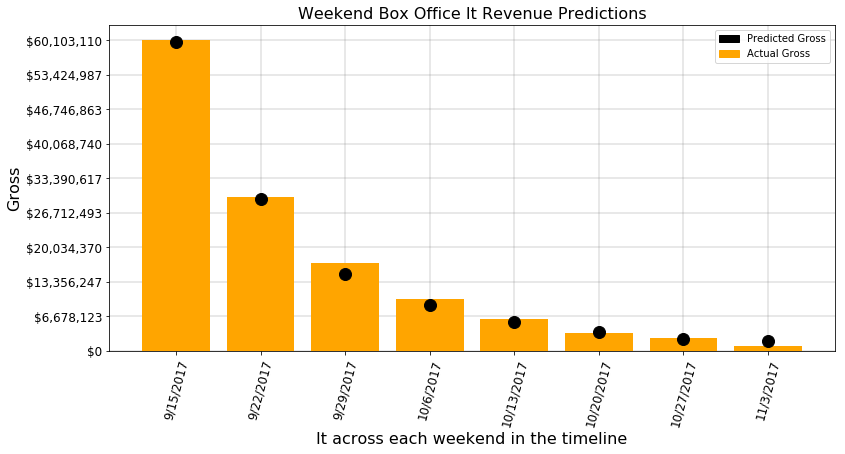

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# read the data output with predictions and actuals from csv
data = pd.read_csv('box_office_validation_predictions.csv', sep=',',header=0)

# pick the movie to display
movie = 'It';

# remove all movies but one
data = data[data.movie == movie]

# number of data points on x axis
ind = np.arange(data.shape[0]) 

# create the two plots - actuals and predicted
fig, ax = plt.subplots()
rects1 = ax.plot(ind, data['Scored Labels'], 'o', color='#000000', zorder = 3, markersize=12)
rects2 = ax.bar(ind, data['gross'], color='orange', zorder = 3)

# set the size of the resulting graph
fig.set_size_inches(13, 6, forward=True)

# create the legend within the graph
predicted = mpatches.Patch(color='#000000')
actual = mpatches.Patch(color='orange')
plt.legend((predicted, actual), ('Predicted Gross', 'Actual Gross'))

# axis labels
plt.ylabel('Gross',fontsize=16)
plt.xlabel(movie + ' across each weekend in the timeline',fontsize=16)
plt.title('Weekend Box Office ' + movie + ' Revenue Predictions',fontsize=16)

# tick labels on the axes

# dates on the x axis
date_to_num_movies = dict();
dates = data['date']
for val in dates:
    val = val.replace(' 12:00:00 AM','')
    if val not in date_to_num_movies:
        date_to_num_movies[val] = 1
    else:
        temp = date_to_num_movies[val]
        temp = temp + 1
        date_to_num_movies[val] = temp
        
x = []
xticks = []
index = 0
for date in date_to_num_movies:
    x.append(index);
    xticks.append(date);
    index = index + date_to_num_movies[date]

# Gross revenue on the y axis
gross = data['gross']
yticks = []
y = []
count = 0;
max = np.amax(gross) 
interval = max/9
for i in range(1, 11):
    yticks.append('${:,.0f}'.format(count))
    y.append(count)
    count = count+interval

plt.xticks(x, xticks, fontsize=12)
plt.yticks(y, yticks, fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_rotation(75)

# create grid marks within the graph
plt.grid(color='#696969', linestyle='-', linewidth=.3, zorder = 0)

# display graph
plt.show()


# Actuals vs. Predicted for all Movies in a Single Week

**Input - All movies all validation weeks predictions vs. actuals:**
-  box_office_validation_predictions.csv
    
**Associated Azure ML Studio Experiment:**
-  https://gallery.cortanaintelligence.com/Experiment/Forecasting-Weekend-Box-Office-Movie-Revenue-5

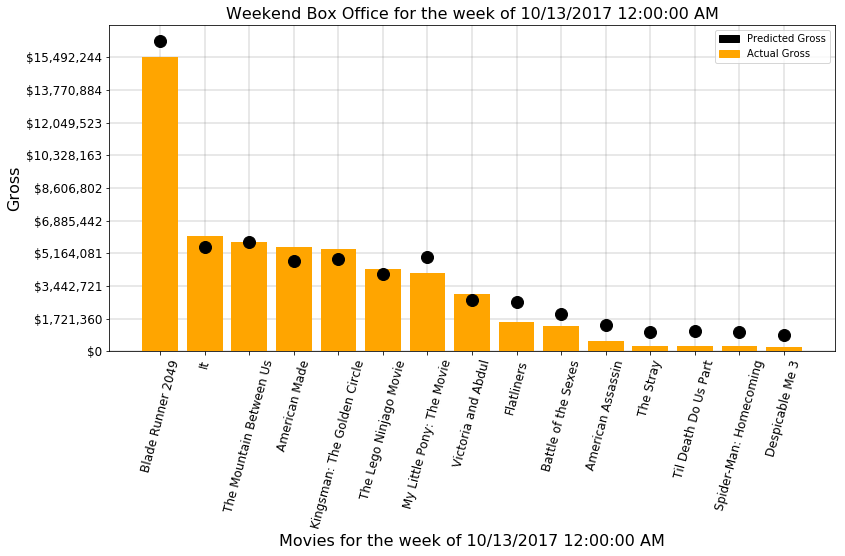

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# read the data output with predictions and actuals from csv
data = pd.read_csv('box_office_validation_predictions.csv', sep=',',header=0)

# week starting on this date
week = '10/13/2017 12:00:00 AM';

# remove all weeks but one
data = data[data.date == week]

# number of data points on x axis
ind = np.arange(data.shape[0]) 

# create the two plots - actuals and predicted
fig, ax = plt.subplots()
rects1 = ax.plot(ind, data['Scored Labels'], 'o', color='#000000', zorder = 3, markersize=12)
rects2 = ax.bar(ind, data['gross'], color='orange', zorder = 3)

# set the size of the resulting graph
fig.set_size_inches(13, 6, forward=True)

# create the legend within the graph
predicted = mpatches.Patch(color='#000000')
actual = mpatches.Patch(color='orange')
plt.legend((predicted, actual), ('Predicted Gross', 'Actual Gross'))

# axis labels
plt.ylabel('Gross',fontsize=16)
plt.xlabel('Movies for the week of ' + week,fontsize=16)
plt.title('Weekend Box Office for the week of ' + week,fontsize=16)

# tick labels on the axes

# movies on the x axis
movies = data['movie']
x = []
xticks = []
index = 0
for m in movies:
    x.append(index);
    xticks.append(m);
    index = index + 1

# revenue on the y axis
gross = data['gross']
yticks = []
y = []
count = 0;
max = np.amax(gross) 
interval = max/9
for i in range(1, 11):
    yticks.append('${:,.0f}'.format(count))
    y.append(count)
    count = count+interval
    
plt.xticks(x, xticks, fontsize=12)
plt.yticks(y, yticks, fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_rotation(75)

# create grid marks within the graph
plt.grid(color='#696969', linestyle='-', linewidth=.3, zorder = 0)

# display graph
plt.show()